In [9]:
%matplotlib inline
import pandas as pd
import numpy as np
import seaborn as sns

from matplotlib import pyplot as plt
from scipy.stats import ttest_ind

In [10]:
float_types = ['ser', 'his', 'val', 'thr', 'pro', 'leu', 'ile', 'arg', 'glu']
short_names = float_types
long_names = ['Serine', 'Histidine', 'Valine', 'Threonine', 'Proline', 'Leucine', 'Isoleucine', 'Arginine', 'Glutamate']
dtypes = dict((aa, pd.np.float64) for aa in float_types)
fname = 'data/fig4/020620_run_f13c_extracted_transpose.csv'

# Data is the fraction of C atoms that are 13C
frac13c_df = pd.read_csv(fname, index_col=0, na_values='NAN', dtype=dtypes)

In [25]:
# calculate the implied 13C fraction from the difference between glu and arg
frac13_glu_implied = ((frac13c_df.arg*6) - (frac13c_df.glu*5))

# calculate the implied 13C fraction from the difference between pro and arg
frac13_pro_implied = ((frac13c_df.arg*6) - (frac13c_df.pro*5))

# mean of the two is an estimate of the intracellular DIC labeling fraction
mean_frac13c = ((frac13_pro_implied + frac13_glu_implied)/2).round(2)

# Calculate the fraction 12C in DIC in vivo. 
# Note that this calculation gives fractions > 1% for high CO2 CCMB1 probably of rubisco fixation.
mean_frac13c[mean_frac13c < 0] = 0
mean_frac12c = 1.0-mean_frac13c

# Convert to frac 12C as opposed to fraction 13C
frac12c_df = frac13c_df.copy()
frac12c_df[float_types] = 1.0 - frac12c_df[float_types]
pct12c_df = frac12c_df.copy()
pct12c_df[float_types] *= 100

In [69]:
frac13_glu_implied

sample
AF 1                           0.741955
AF 2                           0.666334
AF 3                           0.717640
AF 4                           0.643918
AF 5                           0.464572
AF 6                           0.054673
AF 7                           0.009667
AF 8                           0.460528
water_blank                         NaN
AF 9                          -0.044250
AF 10                          0.043518
AF 11                          0.067839
AF 12                          0.074215
AF 13                          0.680346
AF 14                          0.712294
water_blank                    0.545559
his_glu_thr_val_gly_std_1ug   -0.051062
lys_asn_ile_trp_pro_std_1ug         NaN
arg_asp_ser_ala_tyr_std_1ug         NaN
leu_gln_met_cys_phe_std_1ug         NaN
25pc 13C biomass               0.154959
50pc 13C biomass               0.562569
75pc 13C biomass               0.547056
100pc 13C biomass              0.741814
dtype: float64

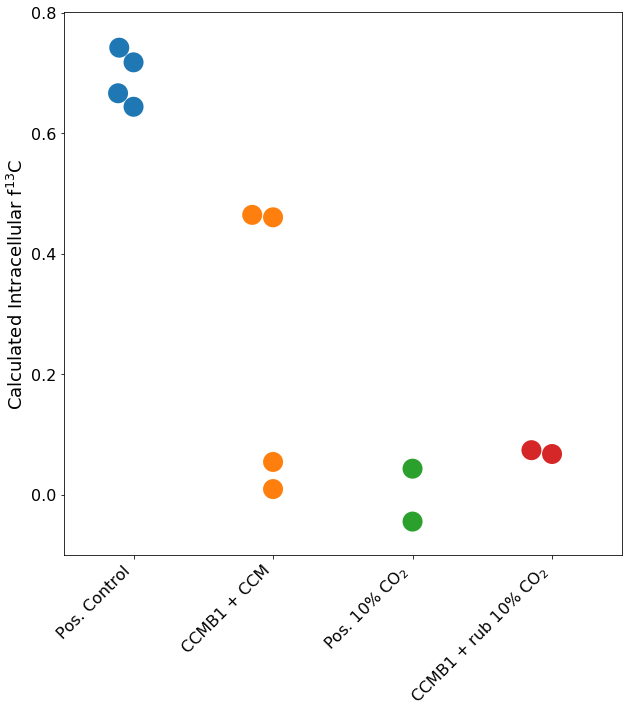

In [64]:
plot_order = ['CAfree_bioreactor', 'CCMB1_bioreactor', 'CAfree_10pct_incubator', 'CCMB1_lsPrk_10pct_incubator', ]
pretty_sample_names = ['Pos. Control', 'CCMB1 + CCM', 'Pos. 10% CO$_2$', 'CCMB1 + rub 10% CO$_2$']

plt.figure(figsize=(10,10))
sns.swarmplot(y=frac13_glu_implied, x=frac13c_df.sample_name, order=plot_order, size=20)
plt.xticks(np.arange(len(plot_order)), pretty_names, fontsize=16, rotation=45, ha='right')
plt.yticks(fontsize=16)
plt.xlabel('')
plt.ylabel('Calculated Intracellular f$^{13}$C', fontsize=18)
plt.show()

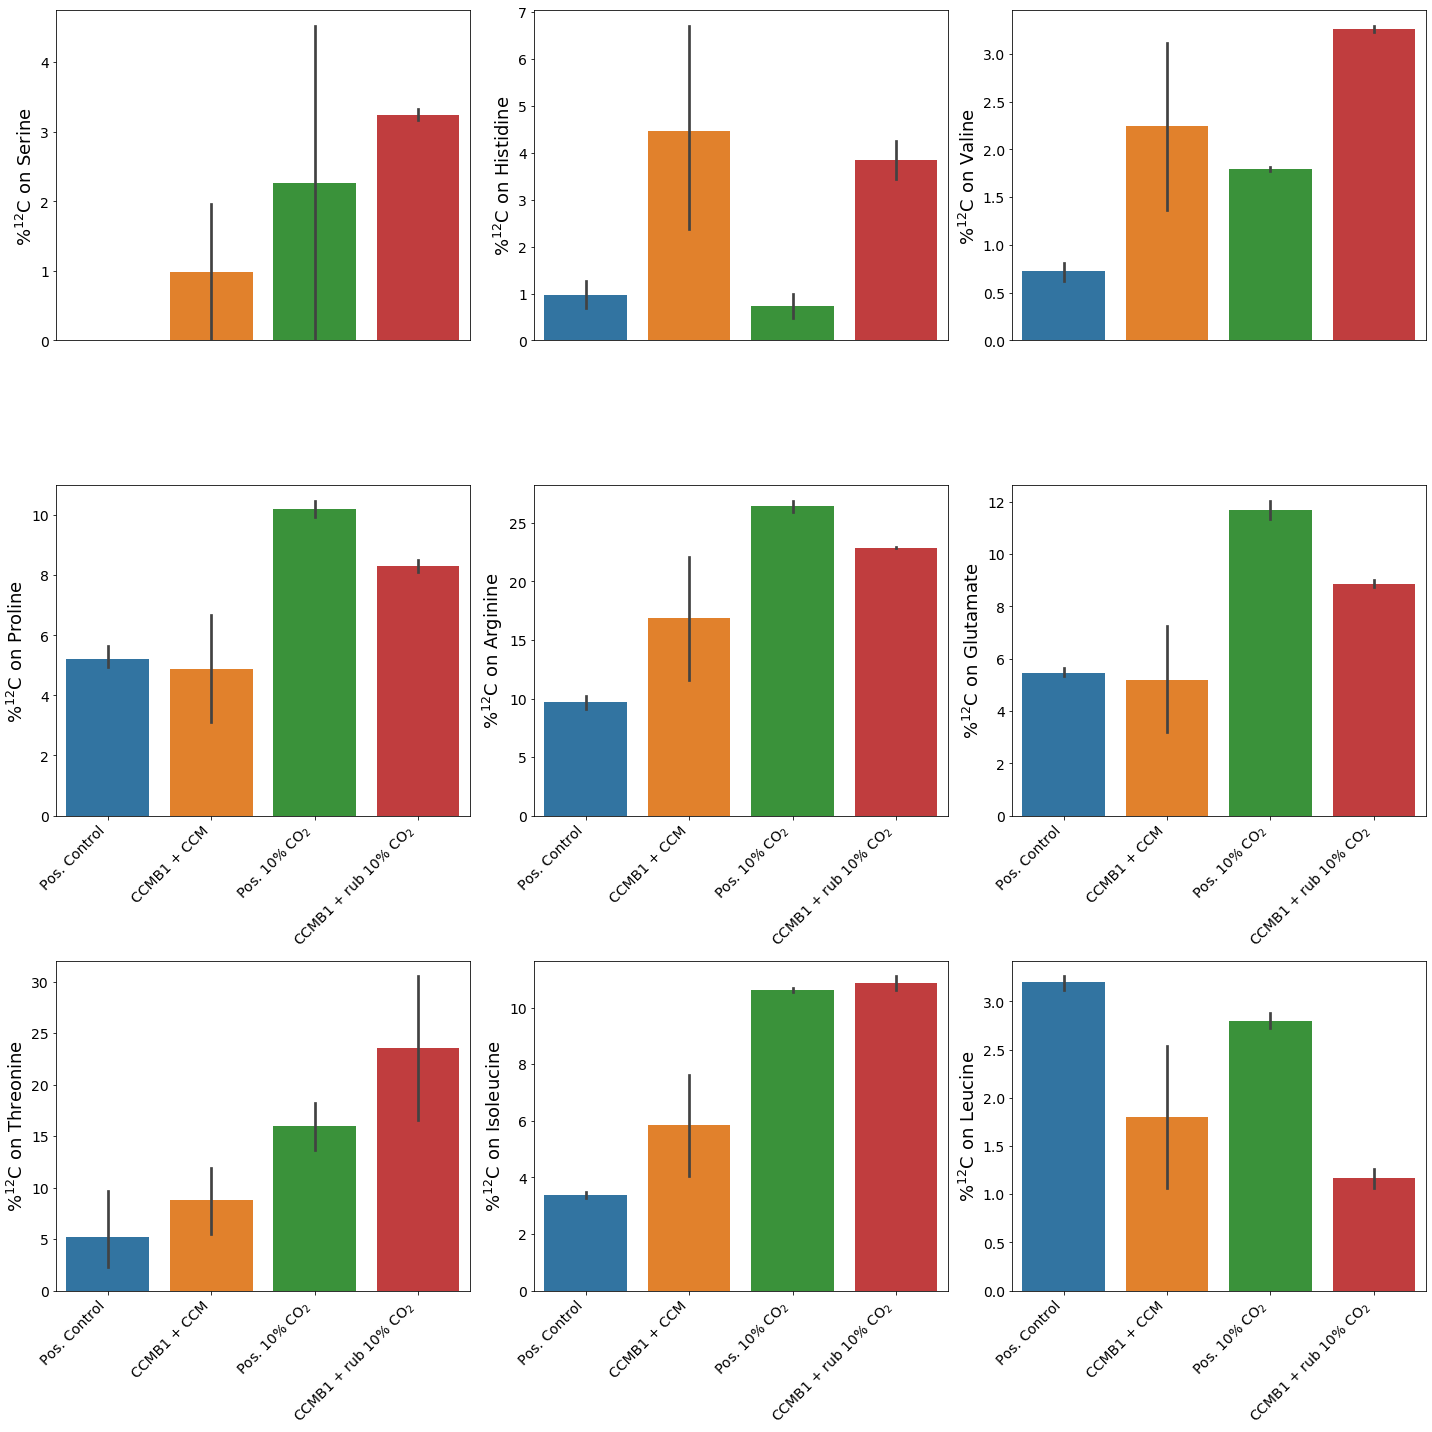

In [68]:
to_plot = ['ser', 'his', 'val', 'pro', 'arg', 'glu', 'thr', 'ile', 'leu']
aa_names = ['Serine', 'Histidine', 'Valine', 'Proline', 'Arginine', 'Glutamate', 'Threonine', 'Isoleucine', 'Leucine' ]

plot_order = ['CAfree_bioreactor', 'CCMB1_bioreactor', 'CAfree_10pct_incubator', 'CCMB1_lsPrk_10pct_incubator', ]
pretty_sample_names = ['Pos. Control', 'CCMB1 + CCM', 'Pos. 10% CO$_2$', 'CCMB1 + rub 10% CO$_2$']

fig = plt.figure(figsize=(20, 20))
for i, aa in enumerate(to_plot):
    plt.subplot(3, 3, i+1)
    sns.barplot(data=pct12c_df, x='sample_name', y=aa, order=plot_order)
    
    plt.yticks(fontsize=14)
    plt.xlabel('')
    plt.ylabel('%$^{12}$C on ' + aa_names[i], fontsize=18)
    if i > 2:
        plt.xticks(np.arange(len(plot_order)), pretty_names, fontsize=14, rotation=45, ha='right')
    else:
        plt.xticks([])
    
plt.tight_layout()
plt.show()
